# Problem: What Types of Ads Produce Most Revenue?

# Goal: Review Regression versus Classification concepts

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df =pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/Advertising.csv',index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


# 1) Exploratory Data Analysis

In [15]:
# Use Scatter plot 

def scatter_plot(feature):
    plt.figure(figsize=(10,5))
    plt.scatter(df[feature], df['sales'], c='black')
    plt.xlabel(f'Money spent on {feature} ads ($)')
    plt.ylabel('Sales (k$)')

    plt.show()
    

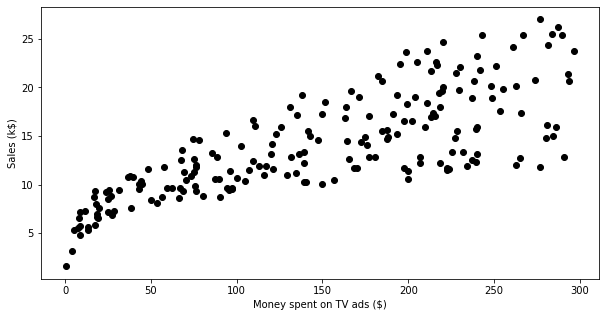

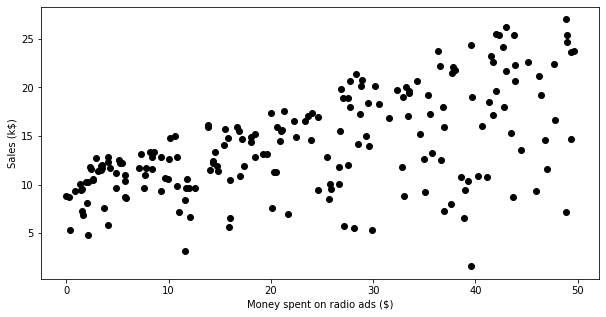

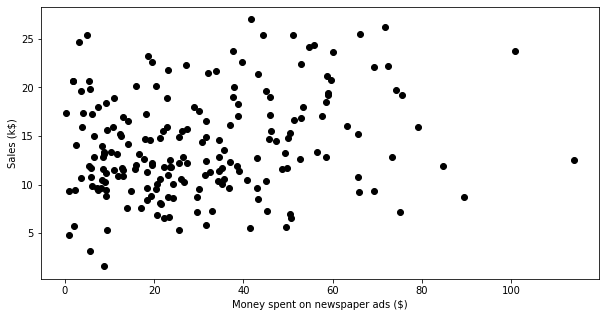

In [16]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

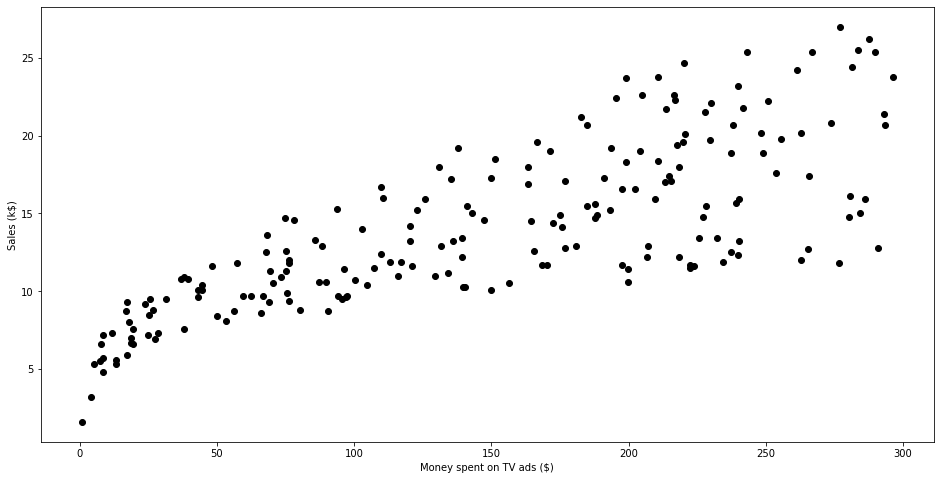

In [6]:
plt.figure(figsize=(16,8))
plt.scatter(df['TV'], df['sales'], c='black')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

# 2) Model: Simple Linear Regression

In [7]:
# Set Target variable to 'y'

X = df['TV'].values.reshape(-1, 1)
y = df['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear model is: 
 Y = 7.032593549127695 + 0.04753664043301975*TV


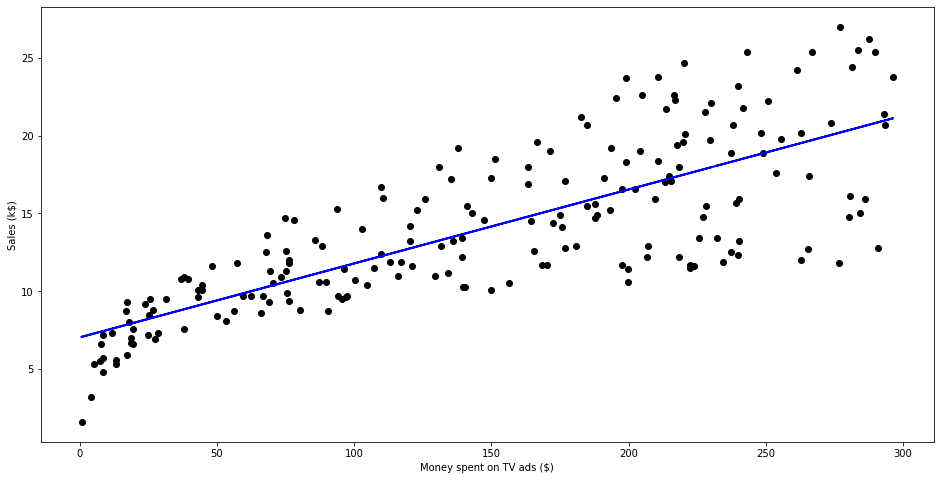

In [8]:
#Predict the Model
predictions = reg.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, y, c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

In [9]:
X = df['TV']
y = df['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        13:15:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Multiple Linear Regression

In [10]:
#Select a few features to predict 'y'
    #Drop 'y'
Xs = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

The linear model is: 
 Y = 2.938889369459412 + 0.0457646454553976*TV + 0.18853001691820448*radio + -0.0010374930424763285*newspaper


In [11]:
X = np.column_stack((df['TV'], df['radio'], df['newspaper']))
y = df['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        13:16:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [19]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [17]:
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

In [20]:
#OUr Linear Regression model from above has mean squared errors 
lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(-mean_MSE)

3.0729465971002106


#### Note: Our linear regression model's 'Mean Squared Error' = 3.0729465971002106

To test for model performace, we can use several methods for cross validation.

To address overfitting of our model, we employ regularization.


## Regularization
### A) Ridge regression (aka 'L2 Regularization') versus B) Lasso regression

In [21]:
#GridSearch is a way to perform regularization meaning 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [22]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.072671338341143


### B) Lasso Regression (aka 'L1 Regularization')

In [23]:
#Use SkLearn library to import Lasso 

from sklearn.linear_model import Lasso
lasso = Lasso(tol=0.05)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, y)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.035998320911191


# Classification for Decision Trees

## Question: How can we use features to classify whether target is 'healthy' or patient of breast cancer?

Age: age of the patient (years)

BMI: body mass index (kg/m2)

Glucose: glucose concentration in blood (mg/dL)

Insulin: insulin concentration in blood (microU/mL)

HOMA: homeostatic model assessment of insulin resistance (glucose times insulin)

Leptin: concentration of leptin - hormone of energy expenditure (ng/mL)

Adiponectin: concentration of adiponectin - protein regulating glucose level (micro g/mL)

Resistin: concentration of resistin - protein secreted by adipose tissue (ng/mL)

MCP.1: concentration of MCP.1 - protein that recruits monocytes to the sites of inflammation due to tissue injure or inflammation (pg/dL)

Classification: Healthy (1) or patient (2)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline


In [25]:
DATAPATH = ('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/breastCancer.csv')
data = pd.read_csv(DATAPATH)

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


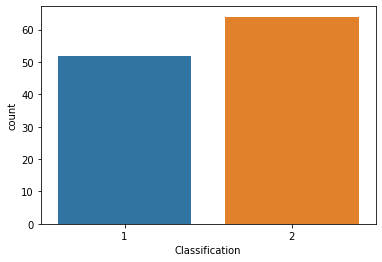

In [26]:
x = data['Classification']
ax = sns.countplot(x=x, data=data)

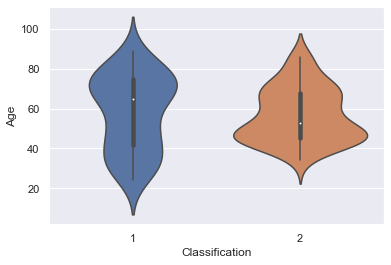

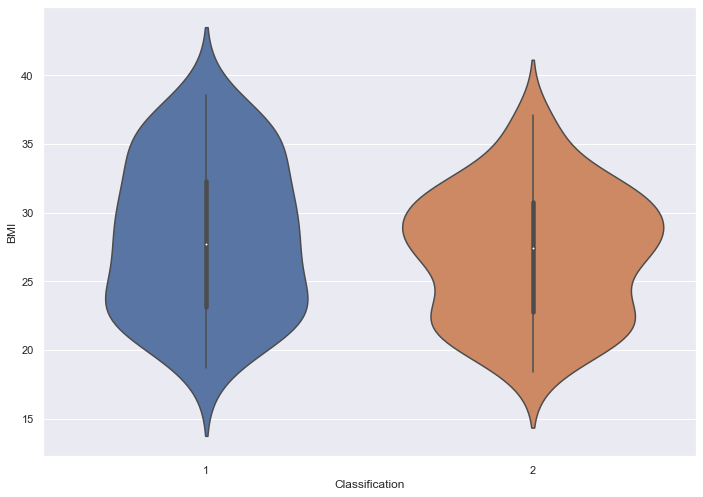

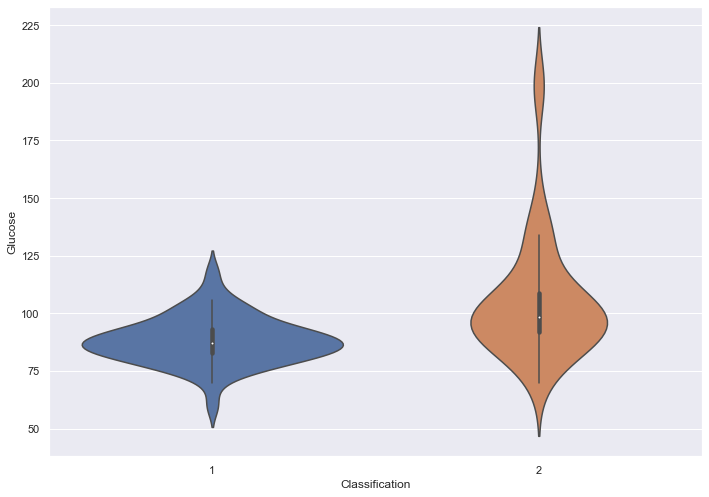

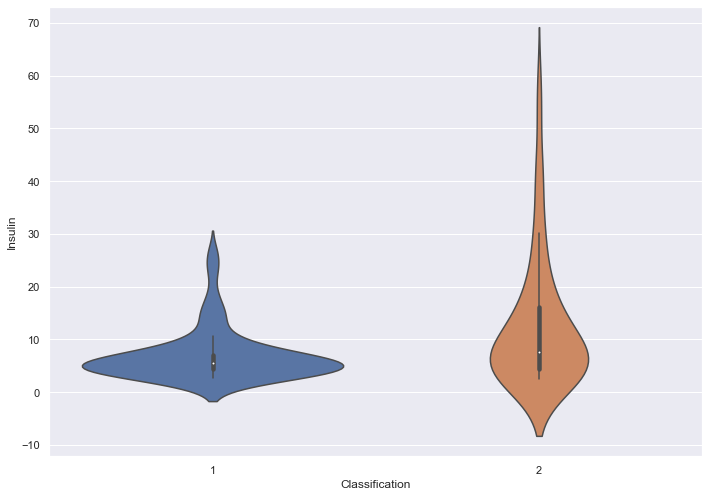

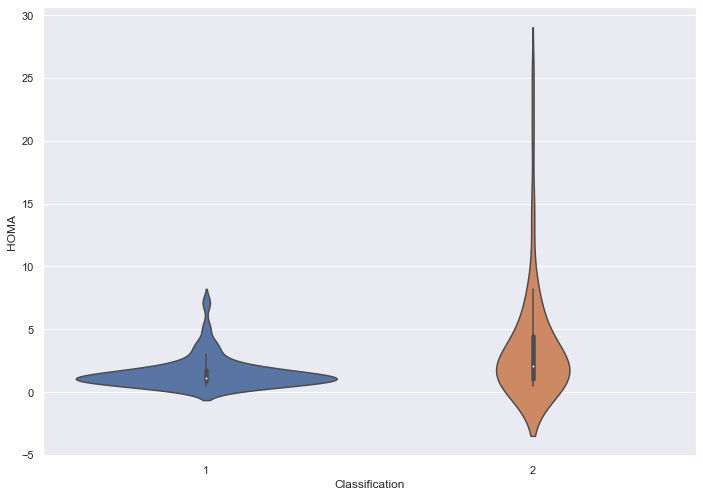

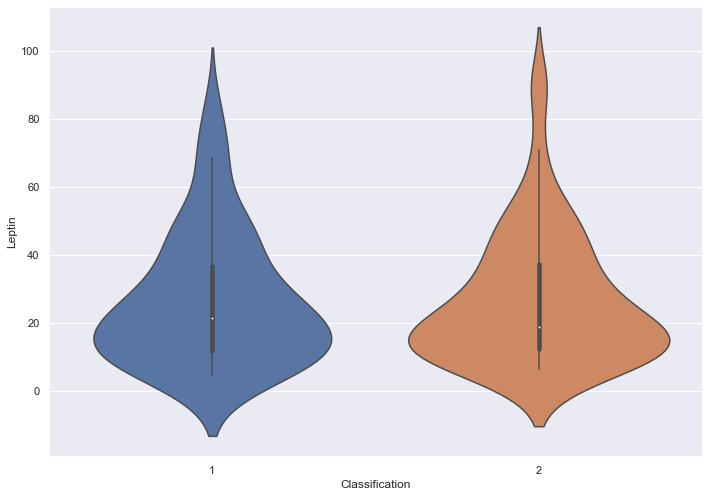

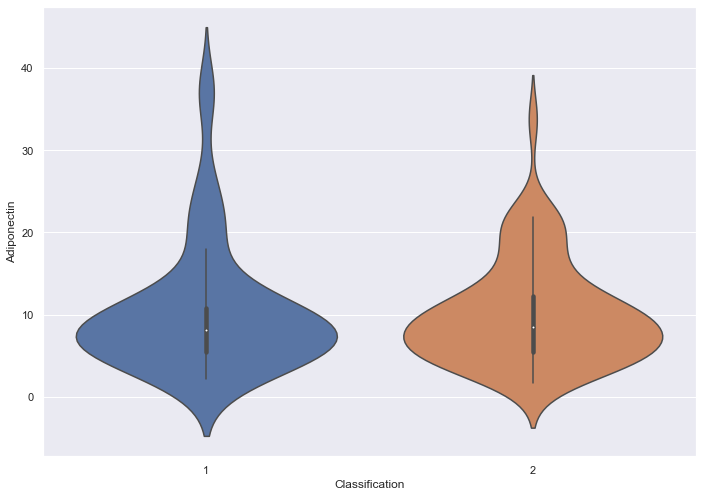

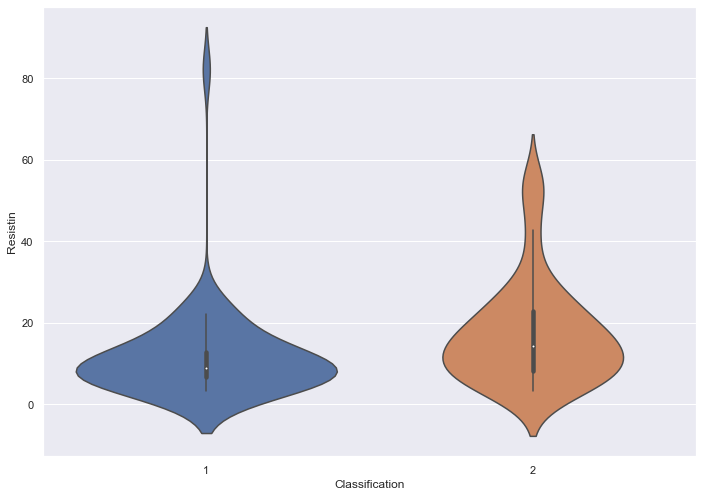

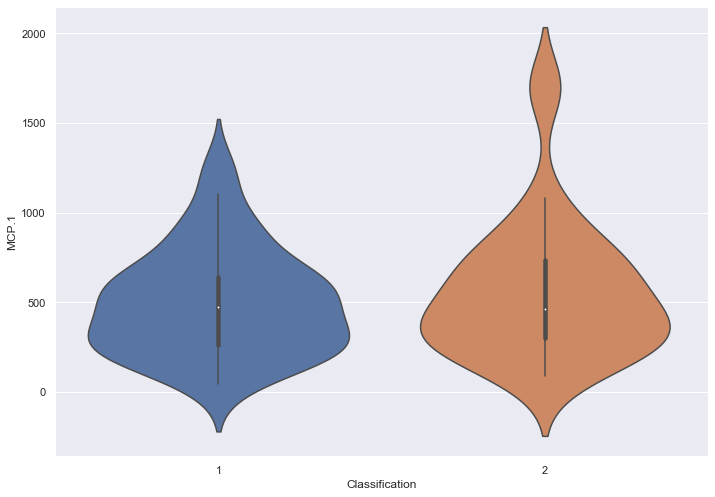

In [27]:
#Review data 

def violin_plots(x, y, data):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.violinplot(x=x, y=col, data=data)

y = data.columns[:-1]
x = data.columns[-1]
        
violin_plots(x, y, data)

In [28]:
#Check for Nulls
for col in data.columns:
    print(f'{col}: {data[col].isnull().sum()}')
    
   

Age: 0
BMI: 0
Glucose: 0
Insulin: 0
HOMA: 0
Leptin: 0
Adiponectin: 0
Resistin: 0
MCP.1: 0
Classification: 0


## Preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [30]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1, 1)
X = data.drop(['Classification'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model: Decision Tree

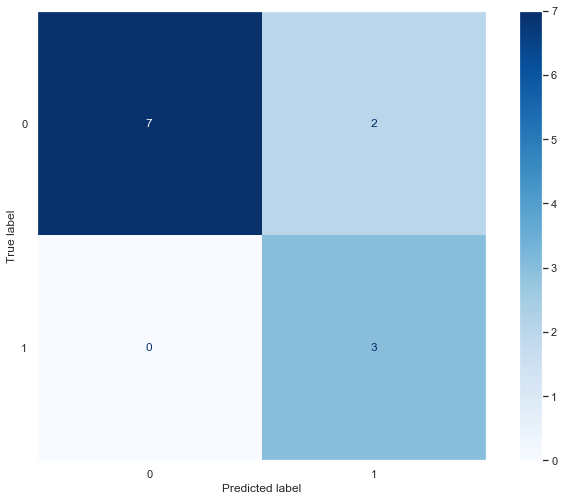

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

[Text(317.3625, 417.44597142857134, 'X[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(199.485, 353.22351428571426, 'X[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(163.215, 289.0010571428571, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(235.75500000000002, 289.0010571428571, 'X[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(145.08, 224.77859999999998, 'X[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(72.54, 160.55614285714285, 'X[2] <= 84.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(36.27, 96.3336857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(108.81, 96.3336857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(217.62, 160.55614285714285, 'X[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(181.35000000000002, 96.3336857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(253.89000000000001, 96.3336857142857, 'X[5] <= 8.747\ngini = 0.142\nsamples = 13\nva

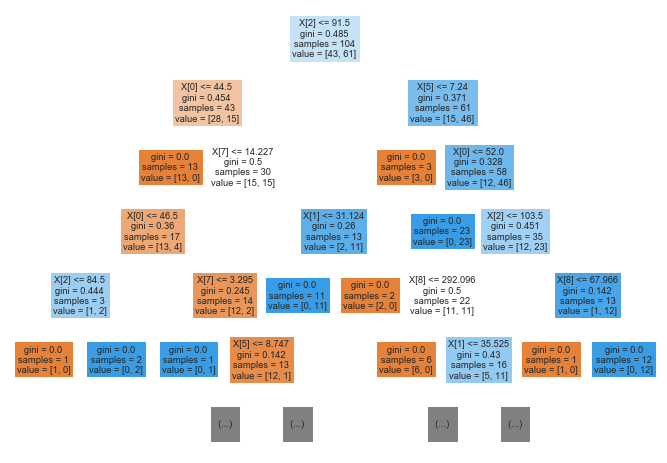

In [32]:
from sklearn.tree import plot_tree

plot_tree(clf, max_depth=5, filled=True)

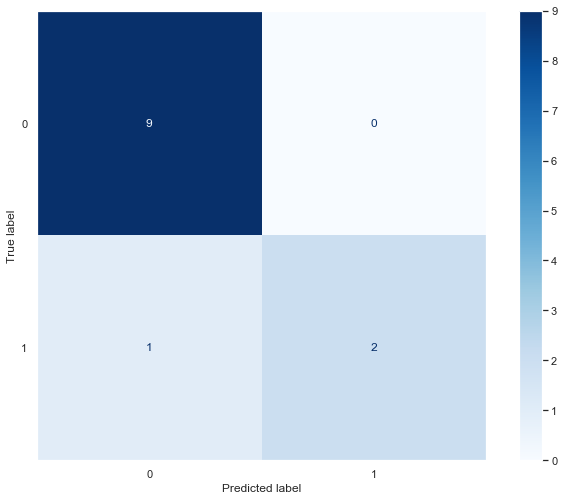

In [33]:
 #Bagging is a method to reduce variance to deal w/variance-bias tradeoff
    #Repeatedly drawing samples from data set

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()

bagging_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(bagging_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## Model 2: Random Forest Classifier

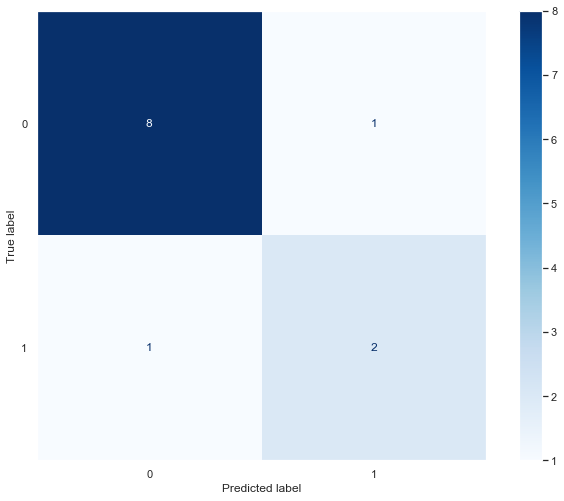

In [34]:
#Random Forest decorrelates the Trees 
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(100)

random_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(random_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## Boosting
Boosting: Trees are grown sequentially. Learns slowly b/c learns from previous trees

### Parameters: 
1) Number of trees (Boosting can overfit if number of trees is too large) 2) Shrinkage controls learning rate; 3) Number of splits in each tree

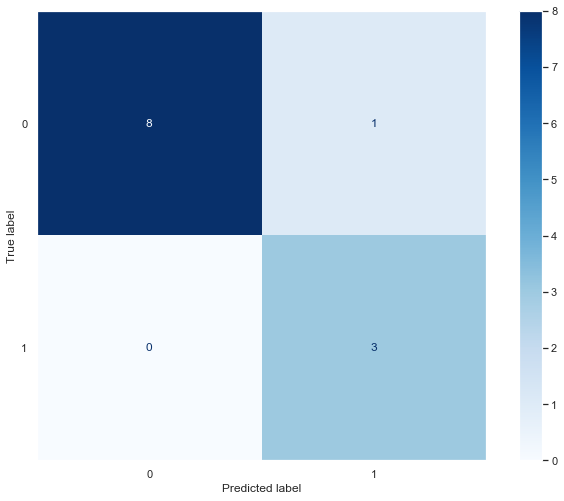

In [35]:
#  Trees will fit the RESIDUAL rather than the "TARGET"
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(boost_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()
